## Imports

In [2]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

# Import our own implementations
import importlib, stochastic_gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(stochastic_gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from stochastic_gradient_descent import sgd_ols, sgd_momentum_ols, sgd_ADAGrad_ols, sgd_RMSProp_ols, sgd_ADAM_ols, \
    sgd_Ridge, sgd_momentum_Ridge, sgd_ADAGrad_Ridge, sgd_RMSProp_Ridge, sgd_ADAM_Ridge, \
        sgd_LASSO, sgd_momentum_LASSO, sgd_ADAGrad_LASSO, sgd_RMSProp_LASSO, sgd_ADAM_LASSO
from OLS import OLS_parameters
from Ridge import Ridge_parameters

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()


## Testing functions, OLS

### Stochastic GD, OLS, fixed learning rate

In [3]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 9

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ols(X_train_s, y_train, eta=1e-2, n_epochs=2000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


### Man får litt noise, men det er kanskje å forvente

GD parameters:  [-0.03066983 -0.98459738  0.07767436  0.97688276 -0.00811852  0.27670446
 -0.03875485 -0.4991177  -0.00733784]
Number of iterations: 16000
Closed-form OLS coefficients:  [-0.0225844  -2.17035032  0.12193737  6.18488693 -0.12361183 -7.11824041
 -0.11534704  2.87533016  0.14434382]
GD parameters equal to closed-form parameters: [ True False False False False False False False False].
Tolerance = 0.01


### SGD With momentum, OLS

In [4]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 15
mom = 0.7

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_momentum_ols(X_train_s, y_train, eta=1e-3, momentum=mom, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")



GD parameters:  [-2.88981594e-02 -5.97099755e-01  3.23438012e-02  2.10719858e-01
  2.05416001e-02  2.37323231e-01  5.59441636e-04  1.31447201e-01
 -1.14332799e-02  2.18054792e-02 -1.51830625e-02 -6.73252762e-02
 -1.30411782e-02 -1.34954132e-01 -7.15795287e-03]
Number of iterations: 8000
Closed-form OLS coefficients:  [-7.39810107e-03 -4.42607177e+00  2.54622412e-01  3.14599434e+01
 -1.99339100e+00 -1.17567355e+02  6.31988233e+00  2.46608659e+02
 -8.82958942e+00 -2.91114084e+02  4.07606976e+00  1.80437321e+02
  1.68729036e+00 -4.56559553e+01 -1.51398015e+00]
GD parameters equal to closed-form parameters: [False False False False False False False False False False False False
 False False False].
Tolerance = 0.01


### SGD with ADAGrad, OLS

In [5]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAGrad_ols(X_train_s, y_train, eta=1e-1, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03378213 -0.8185458   0.06571872  0.69595632  0.00103775  0.29098795
 -0.04916049 -0.36310381]
Number of iterations: 8000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [ True False False False False False False False].
Tolerance = 0.01


### SGD with RMSProp, OLS

In [6]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 4

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_RMSProp_ols(X_train_s, y_train, eta=1e-1, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.10433213 -0.59809936 -0.08310079  0.60793621]
Number of iterations: 8000
Closed-form OLS coefficients:  [-0.02249711 -0.70195862  0.02683544  0.50740635]
GD parameters equal to closed-form parameters: [ True  True False  True].
Tolerance = 0.1


### SGD with ADAM, OLS

In [7]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAM_ols(X_train_s, y_train, eta=1e-2, n_epochs=1000, M=40)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.01047026 -1.08211345  0.08973372  1.13052707 -0.00638334  0.29471204
 -0.05881346 -0.56908968]
Number of iterations: 2000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [ True False False False False False False False].
Tolerance = 0.1


### Computing parameters with SGD, OLS

In [8]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables:
deg_max = 15
eta = 1e-2
n_epochs = 1000

# Lists for MSEs
MSE_closed_form_OLS = []
MSE_gd_fixed_learning_rate_OLS = []
MSE_gd_momentum_OLS = []
MSE_gd_ADAGrad_OLS = []
MSE_gd_RMSProp_OLS = []
MSE_gd_ADAM_OLS = []

# Lists for R2-scores
R2_score_closed_form_OLS=[]
R2_gd_fixed_learning_rate_OLS = []
R2_gd_momentum_OLS = []
R2_gd_ADAGrad_OLS = []
R2_gd_RMSProp_OLS = []
R2_gd_ADAM_OLS = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_OLS = []
num_iterations_gd_momentum_OLS = []
num_iterations_gd_ADAGrad_OLS = []
num_iterations_gd_RMSProp_OLS = []
num_iterations_gd_ADAM_OLS = []

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent methods and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    # Fixed learning rate:
    beta_gd_fixed_rate, t = sgd_ols(X_train_s, y_train, eta = 1e-3, n_epochs=n_epochs)
    num_iterations_gd_fixed_learning_rate_OLS.append(t)
    # With momentum:
    beta_gd_momentum, t = sgd_momentum_ols(X_train_s, y_train, eta = 1e-3, momentum = 0.7, n_epochs=n_epochs, M=10)
    num_iterations_gd_momentum_OLS.append(t)
    # With ADAGrad:
    beta_gd_ADAGrad, t = sgd_ADAGrad_ols(X_train_s, y_train, eta = 1e-2, n_epochs=n_epochs)
    num_iterations_gd_ADAGrad_OLS.append(t)
    # With RMSProp:
    beta_gd_RMSProp, t = sgd_RMSProp_ols(X_train_s, y_train, eta = 1e-4, n_epochs=n_epochs)
    num_iterations_gd_RMSProp_OLS.append(t)
    # With ADAM:
    beta_gd_ADAM, t = sgd_ADAM_ols(X_train_s, y_train, eta = eta, n_epochs=n_epochs)
    num_iterations_gd_ADAM_OLS.append(t)
    
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_OLS.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_OLS.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_OLS.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_OLS.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_OLS.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_OLS.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))

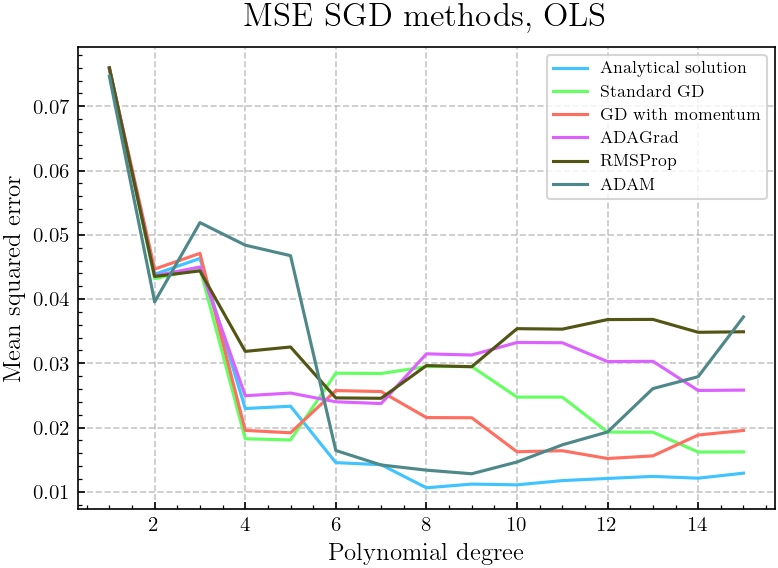

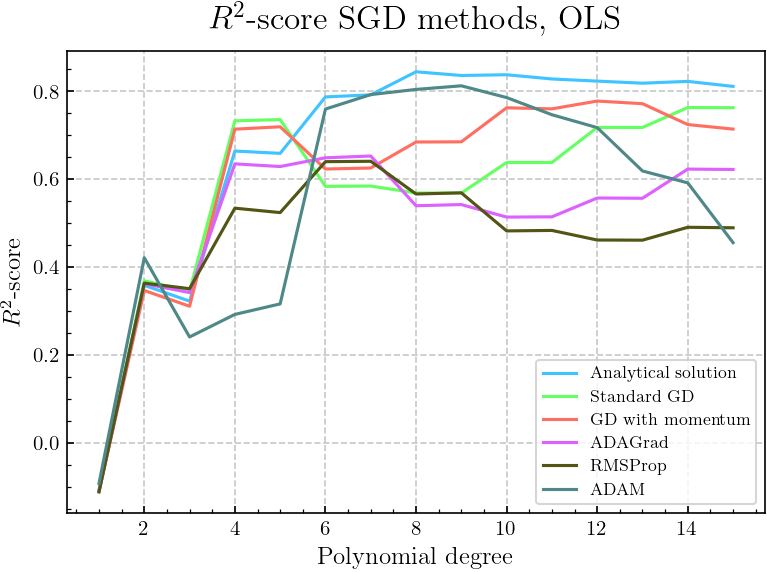

In [9]:
### Plotting results
degrees = np.arange(1, deg_max+1)

# MSE

plt.figure()
plt.plot(degrees, MSE_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gd_fixed_learning_rate_OLS, label="Standard GD", color="#64FF61", linewidth=1.5)
plt.plot(degrees, MSE_gd_momentum_OLS, label="GD with momentum ", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAGrad_OLS, label="ADAGrad ", color="#DD61FF", linewidth=1.5)
plt.plot(degrees, MSE_gd_RMSProp_OLS, label="RMSProp ", color="#525513", linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAM_OLS, label="ADAM ", color='#4E8888', linewidth=1.5)
plt.title("MSE SGD methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/MSE_stochastic_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_gd_fixed_learning_rate_OLS, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(degrees, R2_gd_momentum_OLS, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, R2_gd_ADAGrad_OLS, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, R2_gd_RMSProp_OLS, label="RMSProp", color="#525513", linewidth=1.5)
plt.plot(degrees, R2_gd_ADAM_OLS, label="ADAM", color="#4E8888", linewidth=1.5)
plt.title("$R^2$-score SGD methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_stochastic_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()


## Ridge

### Testing

### Standard stochastic gradient descent

In [10]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 0.1
eta = 1e-3

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=5)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02859328 -0.45480349  0.02057901  0.11114812  0.01545975  0.14058495
  0.0015611   0.06054359 -0.00721968 -0.03271985]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.03531072 -0.99590478  0.09336993  1.08306019 -0.03110066  0.05404633
 -0.0386366  -0.30871566  0.00768986 -0.06101634]
GD parameters equal to closed-form parameters: [ True False  True False  True  True  True False  True  True].
Tolerance = 0.1


### SGD with momentum

In [11]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
lam = 1
eta = 1e-3
mom = 0.9

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_momentum_Ridge(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, n_epochs=1000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02450347 -0.56578628  0.03946637  0.27583532  0.00816172  0.21593049
 -0.01751888  0.042673   -0.02537065 -0.10933612]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.03141439 -0.57438132  0.0342251   0.27591394  0.01404666  0.20579816
 -0.00675283  0.02442475 -0.01413359 -0.13237038]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.1


### SGD with ADAGrad

In [12]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.001
eta = 1e-1


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAGrad_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.0160184  -0.69448238  0.02740538  0.51396377]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.02250734 -0.70176442  0.0268376   0.50721309]
GD parameters equal to closed-form parameters: [ True  True  True  True].
Tolerance = 0.01


### SGD with RMSProp

In [13]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
lam = 0.1
eta = 1e-3


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_RMSProp_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=5)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02892702 -0.70797695  0.05033202  0.42179153  0.01643832  0.32726731
 -0.01647881  0.03059221 -0.0254267  -0.25324182]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.03531072 -0.99590478  0.09336993  1.08306019 -0.03110066  0.05404633
 -0.0386366  -0.30871566  0.00768986 -0.06101634]
GD parameters equal to closed-form parameters: [ True False False False False False False False False False].
Tolerance = 0.01


### SGD with ADAM

In [14]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 9
lam = 0.01
eta = 1e-3


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAM_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=16)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03737923 -0.5624247   0.03805058  0.24762047  0.01858032  0.18286168
 -0.00737695 -0.07714674 -0.01381071]
Number of iterations: 5000
Closed-form Ridge coefficients:  [-0.03935469 -1.4475293   0.16095454  2.82037123 -0.15871213 -2.13978869
 -0.00853019  0.53246019  0.04430625]
GD parameters equal to closed-form parameters: [ True False False False False False  True False False].
Tolerance = 0.01


## Compute parameters with SGD, Ridge

In [18]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 13
mom = 0.9
lambdas = np.logspace(-4, 2,20)
eta = 1e-3
num_epochs = 1000
mom = 0.9

# Lists for MSEs
MSE_closed_form_Ridge = []
MSE_gd_fixed_learning_rate_Ridge = []
MSE_gd_momentum_Ridge = []
MSE_gd_ADAGrad_Ridge = []
MSE_gd_RMSProp_Ridge = []
MSE_gd_ADAM_Ridge = []

# Lists for R2-scores
R2_score_closed_form_Ridge=[]
R2_gd_fixed_learning_rate_Ridge = []
R2_gd_momentum_Ridge = []
R2_gd_ADAGrad_Ridge = []
R2_gd_RMSProp_Ridge = []
R2_gd_ADAM_Ridge = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_Ridge = []
num_iterations_gd_momentum_Ridge = []
num_iterations_gd_ADAGrad_Ridge = []
num_iterations_gd_RMSProp_Ridge = []
num_iterations_gd_ADAM_Ridge = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    # Computing parameters with the different methods:
    # Analytical solution
    beta_closed = Ridge_parameters(X_train_s, y_train, l)
    # Gradient descent, fixed learning rate:
    beta_gd_fixed_rate, t = sgd_Ridge(X_train_s, y_train, lam=l, eta=1e-4, n_epochs=num_epochs)
    num_iterations_gd_fixed_learning_rate_Ridge.append(t)
    # Gradient descent with momentum
    beta_gd_momentum, t = sgd_momentum_Ridge(X_train_s, y_train, lam=l, eta=1e-4, momentum=mom, n_epochs=num_epochs)
    num_iterations_gd_momentum_Ridge.append(t)
    # Gradient descent with ADAGrad
    beta_gd_ADAGrad, t = sgd_ADAGrad_Ridge(X_train_s, y_train, lam=l, eta=1e-1, n_epochs=num_epochs)
    num_iterations_gd_ADAGrad_Ridge.append(t)
    # Gradient descent with RMSProp
    beta_gd_RMSProp, t = sgd_RMSProp_Ridge(X_train_s, y_train, lam=l, eta=1e-3, n_epochs=num_epochs)
    num_iterations_gd_RMSProp_Ridge.append(t)
    # Gradient descent with ADAM
    beta_gd_ADAM, t = sgd_ADAM_Ridge(X_train_s, y_train, lam=l, eta=1e-3, n_epochs=num_epochs)
    num_iterations_gd_ADAM_Ridge.append(t)
    
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_Ridge.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_Ridge.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_Ridge.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_Ridge.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_Ridge.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_Ridge.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_Ridge.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))
    

## Plotting restults

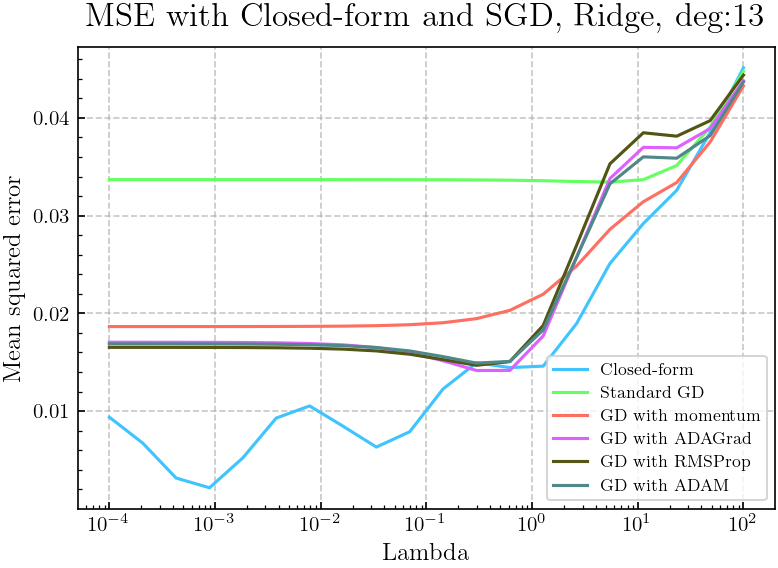

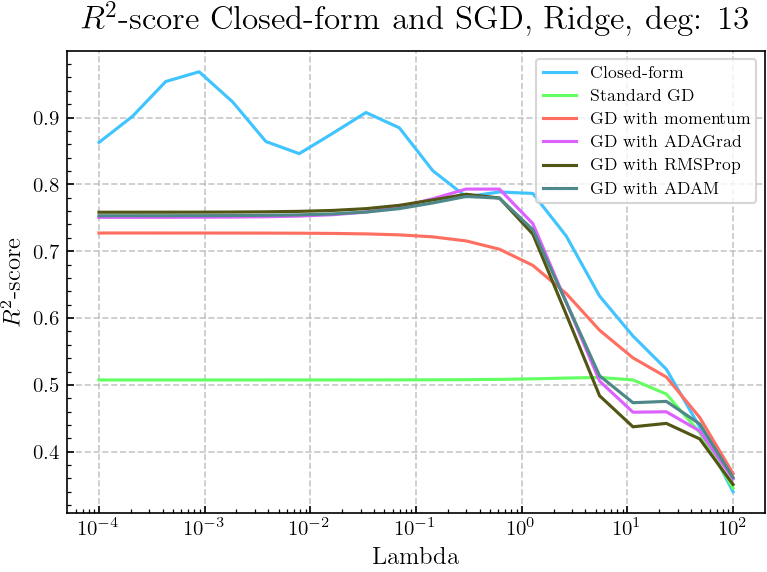

In [19]:
# MSEs
plt.figure()
plt.plot(lambdas, MSE_closed_form_Ridge, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_fixed_learning_rate_Ridge, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_Ridge, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAGrad_Ridge, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_RMSProp_Ridge, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAM_Ridge, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"MSE with Closed-form and SGD, Ridge, deg:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse__stochastic_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


# R2-scores
plt.plot(lambdas, R2_score_closed_form_Ridge, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_fixed_learning_rate_Ridge, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, R2_gd_momentum_Ridge, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAGrad_Ridge, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_RMSProp_Ridge, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAM_Ridge, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"$R^2$-score Closed-form and SGD, Ridge, deg: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_stochastic_gradient_descent_methods_Ridge.pdf", bbox_inches="tight")
plt.show()


## LASSO

### Testing SGD, LASSO

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 5
lam = 0.1
eta = 1e-3

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta = sgd_LASSO(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=5)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("Scikit_learn LASSO coefficients: ", beta_sklearn)
tol=1e-3
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [ 0.        -0.1147758  0.         0.         0.       ]
Number of iterations: 16000
Scikit_learn LASSO coefficients:  [-0.         -0.11489355 -0.         -0.         -0.        ]
GD parameters equal to closed-form parameters: [ True  True  True  True  True].
Tolerance = 0.001


### Testing SGD with momentum, LASSO

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 5
lam = 0.0001
eta = 1e-1
mom = 0.7

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta = sgd_momentum_LASSO(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, n_epochs=1000, M=16)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("Scikit_learn LASSO coefficients: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.06295275 -0.70694086  0.10139918  0.50883867 -0.07363304]
Number of iterations: 16000
Scikit_learn LASSO coefficients:  [-0.04459427 -0.70093954  0.09874255  0.50560897 -0.05298373]
GD parameters equal to closed-form parameters: [False  True  True  True False].
Tolerance = 0.01


### Testing SGD with ADAGrad, LASSO

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 5
lam = 0.01
eta = 1e-2

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta = sgd_ADAGrad_LASSO(X_train_s, y_train, lam = lam, eta=eta, n_epochs=10000, M=16)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("Scikit_learn LASSO coefficients: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-9.94654766e-04 -4.04438378e-01 -8.82139247e-06  2.09910691e-01
  0.00000000e+00]
Number of iterations: 16000
Scikit_learn LASSO coefficients:  [-0.         -0.45165986 -0.          0.25708197 -0.        ]
GD parameters equal to closed-form parameters: [ True False  True False  True].
Tolerance = 0.01


### Testing SGD with RMSProp, LASSO

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 6
lam = 0.001
eta = 1e-2

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta = sgd_RMSProp_LASSO(X_train_s, y_train, lam = lam, eta=eta, n_epochs=10000, M=16)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("Scikit_learn LASSO coefficients: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [ 1.68054872e-04 -1.08615536e+00  8.32397214e-03  1.56067980e+00
  5.34370133e-04 -6.92063855e-01]
Number of iterations: 16000
Scikit_learn LASSO coefficients:  [-0.00000000e+00 -1.08748912e+00  9.50205547e-04  1.57219537e+00
  0.00000000e+00 -7.07447008e-01]
GD parameters equal to closed-form parameters: [ True  True  True  True  True  True].
Tolerance = 0.01


### Testing SGD with ADAM, LASSO

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 5
lam = 0.001
eta = 1e-2

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta = sgd_ADAM_LASSO(X_train_s, y_train, lam = lam, eta=eta, n_epochs=10000, M=16)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=100000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("Scikit_learn LASSO coefficients: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-1.42267515e-02 -6.77912865e-01  7.37768153e-03  4.82277917e-01
  1.05022264e-04]
Number of iterations: 16000
Scikit_learn LASSO coefficients:  [-0.01174323 -0.67757787  0.01507205  0.48303827  0.        ]
GD parameters equal to closed-form parameters: [ True  True  True  True  True].
Tolerance = 0.01


## Compute parameters with SGD, LASSO

In [16]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
mom = 0.9
lambdas = np.logspace(-4, 2,20)
eta = 1e-3
num_epochs = 1000
mom = 0.9

# Lists for MSEs
MSE_sklearn_LASSO = []
MSE_gd_fixed_learning_rate_LASSO = []
MSE_gd_momentum_LASSO = []
MSE_gd_ADAGrad_LASSO = []
MSE_gd_RMSProp_LASSO = []
MSE_gd_ADAM_LASSO = []

# Lists for R2-scores
R2_sklearn_LASSO = []
R2_gd_fixed_learning_rate_LASSO = []
R2_gd_momentum_LASSO = []
R2_gd_ADAGrad_LASSO = []
R2_gd_RMSProp_LASSO = []
R2_gd_ADAM_LASSO = []


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    # Computing parameters with the different methods:
    # Analytical solution
    lasso = Lasso(alpha=l, fit_intercept=False, max_iter=100000)
    lasso.fit(X_train_s, y_train)
    beta_sklearn = lasso.coef_
    # Gradient descent, fixed learning rate:
    beta_gd_fixed_rate = sgd_LASSO(X_train_s, y_train, lam=l, eta=1e-4, n_epochs=num_epochs)
    # Gradient descent with momentum
    beta_gd_momentum = sgd_momentum_LASSO(X_train_s, y_train, lam=l, eta=1e-4, momentum=mom, n_epochs=num_epochs)
    # Gradient descent with ADAGrad
    beta_gd_ADAGrad = sgd_ADAGrad_LASSO(X_train_s, y_train, lam=l, eta=1e-1, n_epochs=num_epochs)
    # Gradient descent with RMSProp
    beta_gd_RMSProp = sgd_RMSProp_LASSO(X_train_s, y_train, lam=l, eta=1e-3, n_epochs=num_epochs)
    # Gradient descent with ADAM
    beta_gd_ADAM = sgd_ADAM_LASSO(X_train_s, y_train, lam=l, eta=1e-3, n_epochs=num_epochs)
    num_iterations_gd_ADAM_Ridge.append(t)    
    # Predict
    y_pred_closed = X_test_s @ beta_sklearn + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_sklearn_LASSO.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_LASSO.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_LASSO.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_LASSO.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_LASSO.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_LASSO.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_sklearn_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))
    

## Plotting results

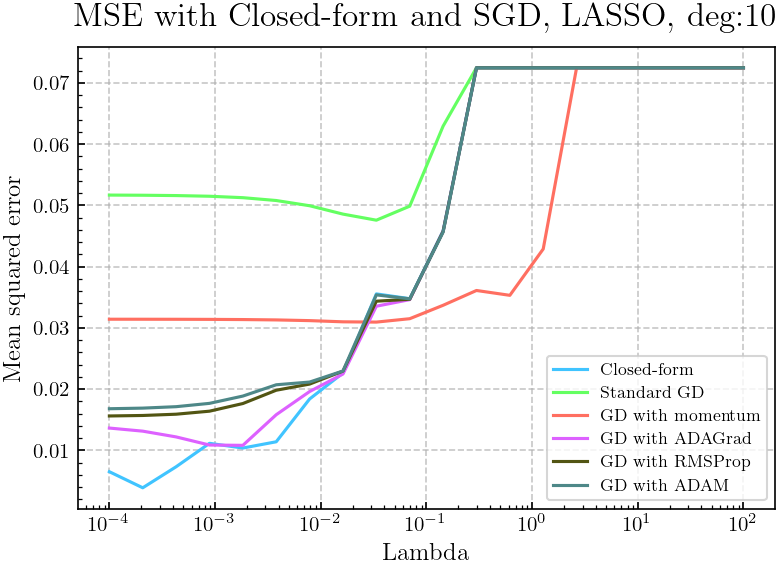

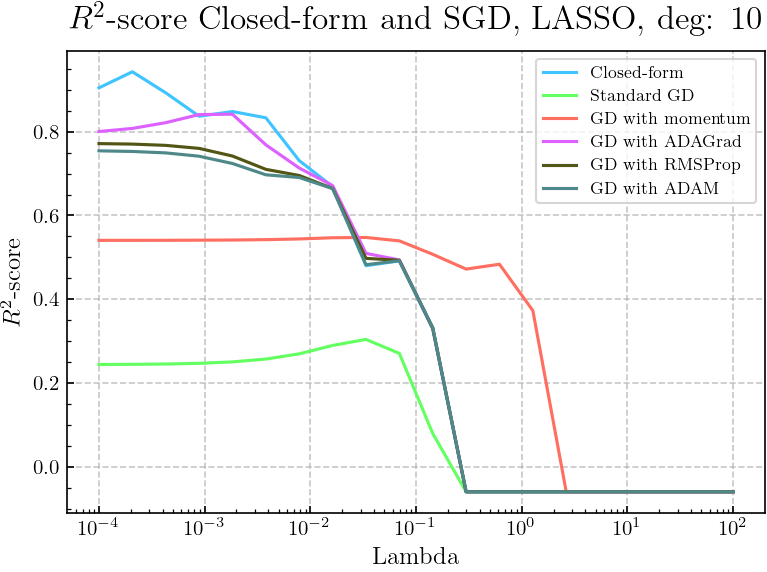

In [17]:
# MSEs
plt.figure()
plt.plot(lambdas, MSE_sklearn_LASSO, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_LASSO, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAGrad_LASSO, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_RMSProp_LASSO, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAM_LASSO, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"MSE with Closed-form and SGD, LASSO, deg:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/mse_stochastic_gradient_descent_methods_LASSO.pdf", bbox_inches="tight")
plt.show()


# R2-scores
plt.plot(lambdas, R2_sklearn_LASSO, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, R2_gd_momentum_LASSO, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAGrad_LASSO, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_RMSProp_LASSO, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAM_LASSO, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"$R^2$-score Closed-form and SGD, LASSO, deg: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.savefig("Plots/r2_stochastic_gradient_descent_methods_LASSO.pdf", bbox_inches="tight")
plt.show()